In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
house_df=pd.read_csv('train.csv')
house_df.columns




Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
#X,Y Features
x_features=['GrLivArea','FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd']
X=house_df[x_features]
#house_df['logsaleprice']=np.log(house_df['SalePrice'])
Y=house_df['SalePrice']                           #applied log
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [42]:
#Fitting the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
#Predicting
y_pred=model.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred))      #explains the percentage of variance the model is explaning.
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))  #explains the average error made while predicting.

R2 Score: 0.6337670693441046
Mean Squared Error: 2809126045.9448595


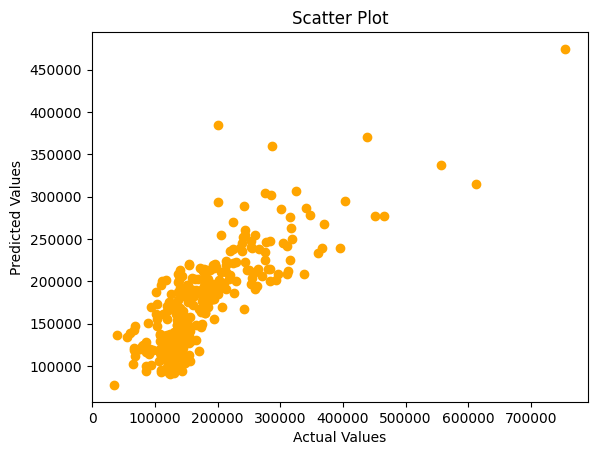

In [48]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot")
plt.show()

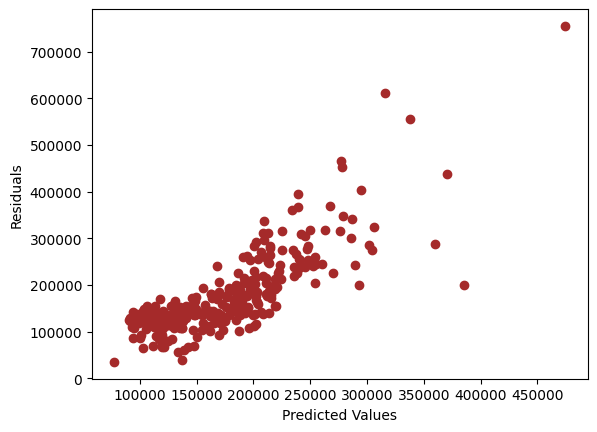

In [49]:
#Plotting scatter plot with residuals and predicted values
residuals=y_test-y_pred
plt.scatter(y_pred,y_test,color="brown")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


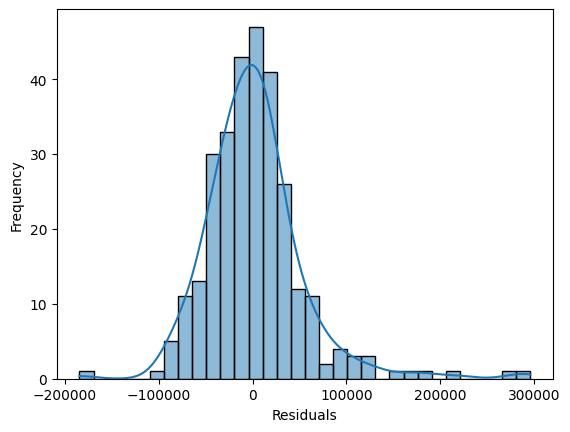

In [50]:
#Using error(residuals) plotting density plot to know error b/w actual and predicted
import seaborn as sns
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

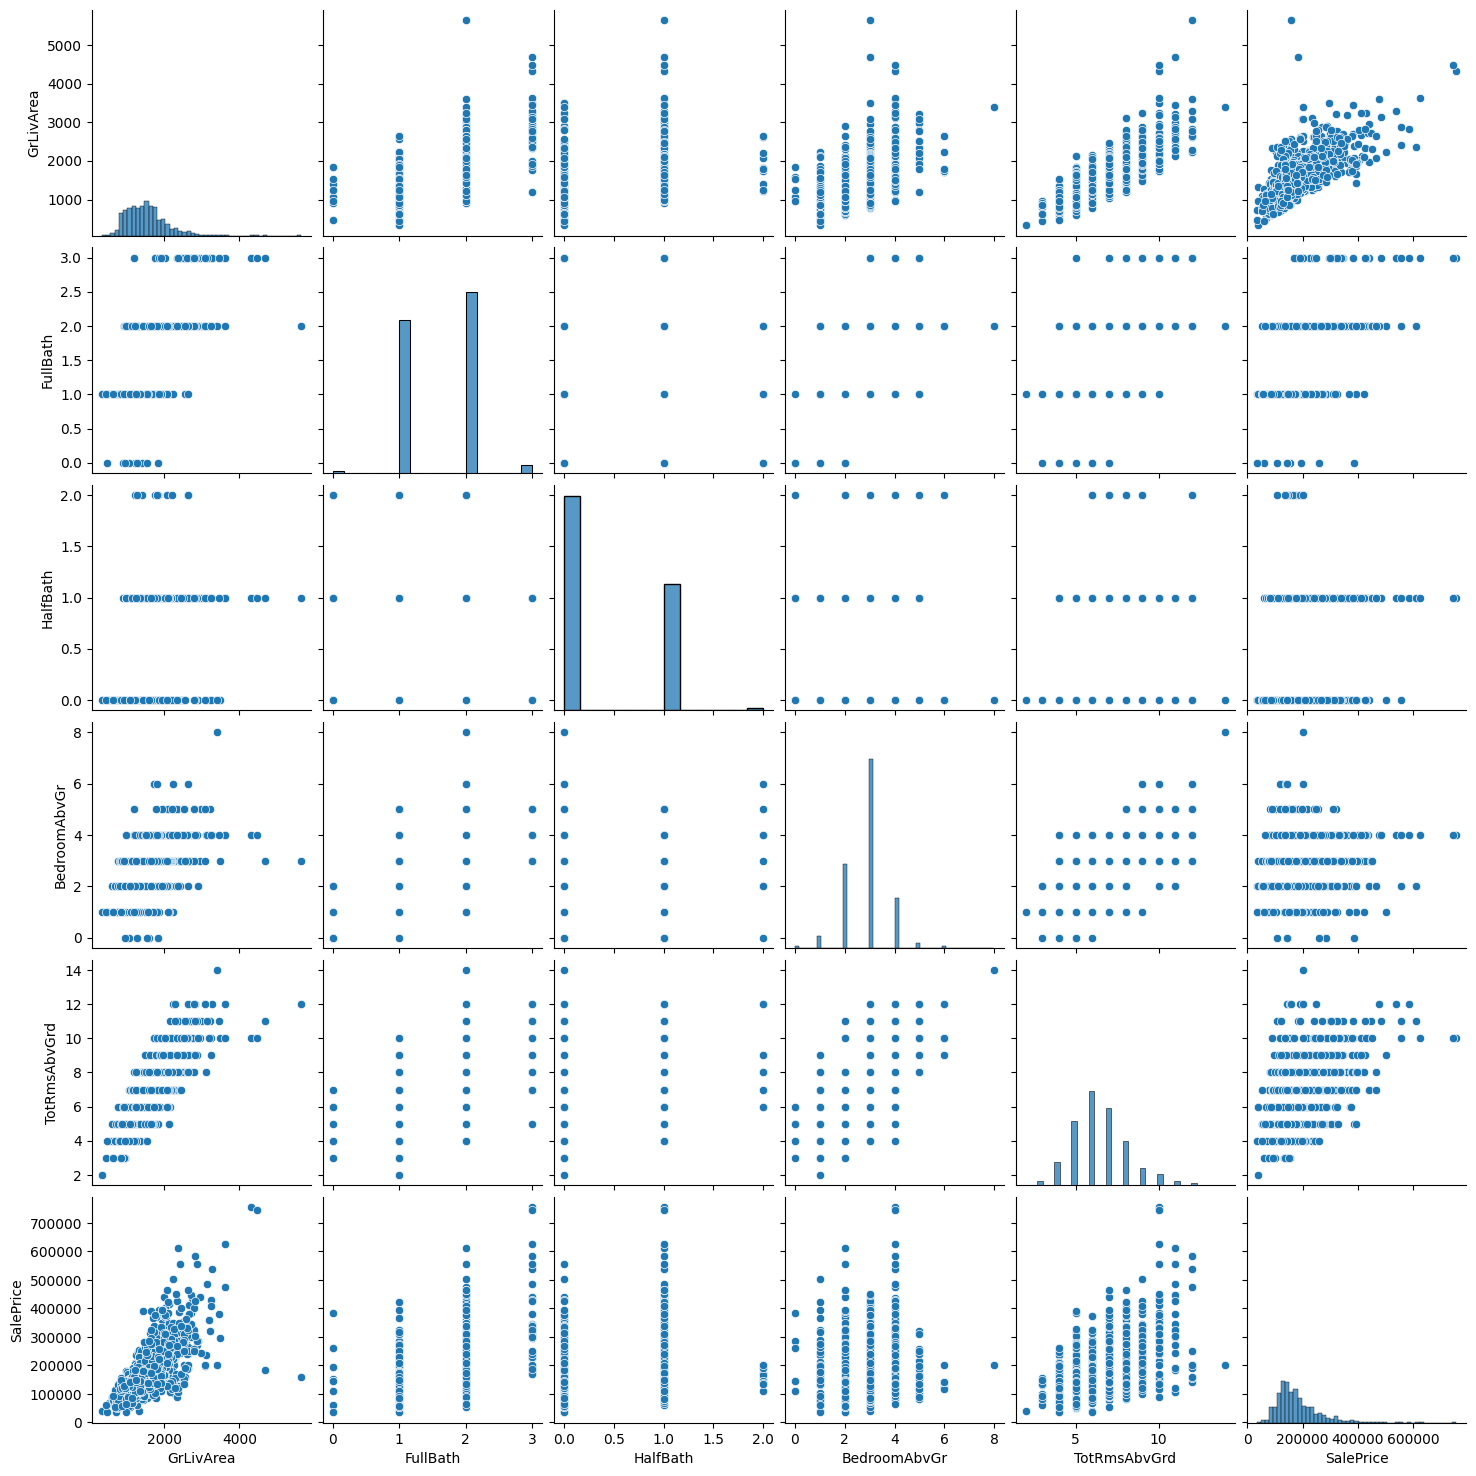

In [52]:
#scatter plot matrix
sns.pairplot(house_df[x_features+['SalePrice']])
plt.show()

In [55]:
#Example Prediction
data = {'GrLivArea':[5000],'FullBath':[2],'HalfBath':[4],'BedroomAbvGr':[4],'TotRmsAbvGrd':[4]}
example = pd.DataFrame(data)
example_prediction = model.predict(example)
print(example_prediction)

[507843.92700985]


In [59]:
test_df=pd.read_csv('test.csv')
test_x=model.predict(test_df[x_features])
predictions_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_x})
print(predictions_df)

        Id      SalePrice
0     1461  122343.475839
1     1462  142899.405464
2     1463  202352.108302
3     1464  202645.044724
4     1465  189910.077876
...    ...            ...
1454  2915  117298.831065
1455  2916  120006.618439
1456  2917  102221.775272
1457  2918  103589.162128
1458  2919  246311.858552

[1459 rows x 2 columns]
